In [31]:
# For the white wine dataset (notorious, infamous)
# Using CTGAN instead in order to "fill in the gaps"
# another option: Copula Synthesizer 
# but for I will stick to CTGAN

# TomekLinks to clean out the overlapping through the dataset
# Autoencoders instead of TomekLinks, might be viable
# consider using ClusterCentroids for noise/overlap removal
# https://miro.medium.com/v2/resize:fit:700/1*1XlHmnc9hKn1oPz48lrn7Q.png

# Kmeans Clustering => let's try assigning each wine a 
# automated unsupervised AI cluster => use this information
# to determine the difference between qualities 5 and 6
# also experiment on other clustering methods than KMeans
# https://scikit-learn.org/1.5/_images/sphx_glr_plot_cluster_comparison_001.png

<h4>Here is to improve the white wine dataset further for the model to work efficiently</h4>

In [32]:
# import the modules needed
import pandas as pd
import seaborn as sns
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import numpy as np
import random
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import confusion_matrix
import itertools
from imblearn.under_sampling import RandomUnderSampler
import seaborn as sns
from ctgan import CTGAN
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import EditedNearestNeighbours
# from adasyn import ADASYN
#from sdv.tabular import CTGAN
#from ctgan import CTGANSynthesizer

# pip install xgboost
from xgboost import XGBClassifier

In [33]:
# pd.set_option('display.float_format', '{:.1f}'.format)
# I load the dataset for reading on pandas
# and dropped all the duplicates
df = pd.read_csv("white_wine_cleaned.csv")

df = df.drop_duplicates()

In [34]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
6            6.2              0.32         0.16             7.0      0.045   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
6                 30.0                 136.0   0.9949  3.18       0.47   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
6      9.6        6

In [35]:
# Goal here is to achieve optimisation
# So its important lock the random seed
# this is to have same result
# without interference but for reproducibility
# random_seed = 43788777
random_seed = 789765555

random.seed(random_seed)
np.random.seed(random_seed)

<h4>Starting with synthesizing with CTGAN however I discovered that CTGAN don't work with my dataset white wine. So I opted for 
EditedNearestNeighbours which absolutely yeilded the desired result I was looking out for.</h4>

In [36]:
df.corr()['quality']

fixed acidity          -0.124636
volatile acidity       -0.190678
citric acid             0.007065
residual sugar         -0.117339
chlorides              -0.217739
free sulfur dioxide     0.010507
total sulfur dioxide   -0.183356
density                -0.337805
pH                      0.123829
sulphates               0.053200
alcohol                 0.462869
quality                 1.000000
Name: quality, dtype: float64

<h4>Above shows the 'alcohol' is more correlated to the 'quality', follow by 'density', chlorides, volatile, acidity and total sulfur dioxide. Residual sugar kind of shows a promising correlation too </h4>

In [37]:

# X/y -split
X = df.drop("quality", axis=1)
y = df['quality']

# Store the synthetic and original datasets
authentic_df = df.copy()
# df = synthetic_df

# print("Synthetic data generation complete!")


In [38]:
# training the split X/y (train/test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

# enn = EditedNearestNeighbours(n_neighbors=3)
enn = EditedNearestNeighbours(n_neighbors=3, sampling_strategy=[5, 6])
X_resampled, y_resampled = enn.fit_resample(X_train, y_train)

print(f"Original data shape: {X_train.shape}, {y_train.shape}")
print(f"Resampled data shape: {X_resampled.shape}, {y_resampled.shape}")

Original data shape: (2772, 11), (2772,)
Resampled data shape: (888, 11), (888,)


<h4>Here, new DataFrame (df_resampled) is created from the resampled feature data (X_resampled) and assigns the original column names to it. Then, added the resampled target variable (y_resampled) as a new column named 'quality'.

Essentially, to recombine the resampled features and the target variable into a single DataFrame. I think this will be useful for further analysis, model training, or any other tasks where a complete dataset with both features and target labels is required.
</h4>
<h4>Basically, the visualization can be read as:
X_resampled: Resampled features say fixed acidity, volatile acidity, citric acide and so on .

y_resampled: Resampled target variable (quality)

df_resampled: Combines X_resampled and y_resampled into one DataFrame.</h4>







In [39]:
# X_resampled and y_resampled
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['quality'] = y_resampled

<Axes: >

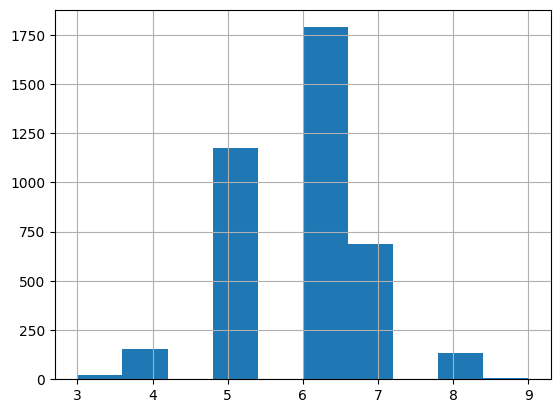

In [40]:
# Again 5 and 6 are overly represented 
# Which could mean the good quality wine 
# will be from 7 to 9
# As well as 3 to 4
df['quality'].hist()

<Axes: >

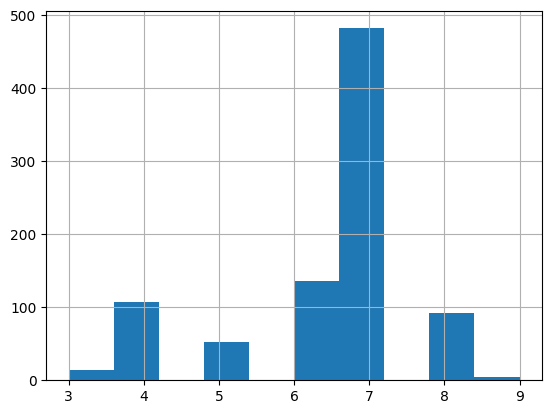

In [41]:
df_resampled['quality'].hist()

In [42]:
authentic_df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
6               6.2              0.32         0.16             7.0      0.045   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
6                    30.0                 136.0  0.99490  3.18       0.47   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  
0         8.8        6  
1         9.5        6  
2        10.1        6  
3         9.9        6  
6         9.6        6  
...       ...      ...  
4893     11.2        6  
4894      9.6        5  
4895      9.4        6  
4896     12.8        7  
4897     11.8        6  

[3961 rows x 12 columns]

In [43]:
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
6               6.2              0.32         0.16             7.0      0.045   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
6                    30.0                 136.0  0.99490  3.18       0.47   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  
0         8.8        6  
1         9.5        6  
2        10.1        6  
3         9.9        6  
6         9.6        6  
...       ...      ...  
4893     11.2        6  
4894      9.6        5  
4895      9.4        6  
4896     12.8        7  
4897     11.8        6  

[3961 rows x 12 columns]

<b>NB:<b> 
<h4>Before sythentic data, The distribution is highly showed imbalanced. Classes with lower values (like 3 and 9) have very few instances (20 and 5 samples respectively), while class 6 has the most instances with 1,788 samples. I this imbalance could be bias in the model towards predicting the majority class (class 6) and lead to poor generalization for minority classes.
And after the synthetic data, the distribution shows that only the class 7 has increased in sample size, now almost matching the sample size of the majority class 6. However, other minority classes (such as 3 and 9) remain unchanged, which I think suggested a targeted or partial oversampling approach where only certain classes were synthetically generated. This approach can reduce model bias without excessively generating synthetic data, allowing for better representation of class 7 while maintaining the original distribution of the other classes.</h4>

In [44]:
# max threshold for majority classes
threshold = 52

# temporary list to containe sample rows
sampled_data = []

for quality, group in authentic_df.groupby('quality'):
    # if a minority group, just add all the data
    if len(group) <= threshold:
        sampled_data.append(group)
    else:
        sampled_data.append(group.sample(threshold))


# combine all data in the sample list
authentic_sample = pd.concat(sampled_data)

# drop the selected data from the original data
authentic_df = authentic_df.drop(authentic_sample.index)

# reset indexes
authentic_sample = authentic_sample.reset_index(drop=True)
authentic_df = authentic_df.reset_index(drop=True)

df = pd.concat([df, authentic_df])
df = df.reset_index(drop=True)

<h4><b>Comparing the df.corr()['quality']<b></h4>
<h4>From the below it shows the fixed acidity correlation increases to -0.115610, same as citric acid increase to 0.004542 and some other features such as residual sugar, sulphates but the changes are so minimal quite slight differences. However, these features didn't really change the alcohol, pH, density, total sulfur dioxide. </h4>

In [45]:
df.corr()['quality']

fixed acidity          -0.116464
volatile acidity       -0.190778
citric acid             0.004838
residual sugar         -0.125067
chlorides              -0.214679
free sulfur dioxide     0.004446
total sulfur dioxide   -0.187472
density                -0.338678
pH                      0.125834
sulphates               0.056566
alcohol                 0.463331
quality                 1.000000
Name: quality, dtype: float64

<h4>Below, the initial class distribution shows the counts of each quality rating and the updated class distribution after removing Tomek Links overlaps:</h4>
<h4>There is reduction in the counts meaning there are reductions in the counts for some classes such as quality 5, 7, 4, 8, and 3, indicating that Tomek Links identified and removed overlapping samples in these classes. However, unchanged counts for others (Class) showed that the count for quality 6 and 9 remained the same, suggesting no Tomek Links were found or removed for these classes.

Therefore, the use of Tomek Links has helped clean the dataset by removing samples that overlap, which are likely to reducing the noise and making the dataset more suitable for modeling. I think the Tomek Links method is essentially useful for addressing class imbalance and improving the quality of the training data.</h4>

In [46]:
# I initialize the TomekLinks
# It is an undersampling method used for removal of overlapping 
# commonly from the majority class. 
# which also helps to clean the dataset by eliminating samples
# that are very close to each other but belong to different classes.
tomek = TomekLinks()

# Display new class distribution
print("Class distribution before overlap removal:")
print(df['quality'].value_counts())

# X/y -split
X = df.drop("quality", axis=1)
y = df['quality']

# create new resampled versions of X and y
X, y = tomek.fit_resample(X, y)

# re-create a new DataFrame
df = pd.DataFrame(X, columns=X.columns)
df['quality'] = y

# Display new class distribution
print("Class distribution AFTER overlap removal:")
print(df['quality'].value_counts())

Class distribution before overlap removal:
quality
6    3524
5    2298
7    1326
4     254
8     210
3      20
9       5
Name: count, dtype: int64
Class distribution AFTER overlap removal:
quality
6    3524
5    2297
7    1324
4     252
8     208
3      17
9       5
Name: count, dtype: int64


In [47]:
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               6.2              0.32         0.16             7.0      0.045   
...             ...               ...          ...             ...        ...   
7622            6.2              0.21         0.29             1.6      0.039   
7623            6.6              0.32         0.36             8.0      0.047   
7624            6.5              0.24         0.19             1.2      0.041   
7625            5.5              0.29         0.30             1.1      0.022   
7626            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    30.0                 136.0  0.99490  3.18       0.47   
...                   ...                   ...      ...   ...        ...   
7622                 24.0                  92.0  0.99114  3.27       0.50   
7623                 57.0                 168.0  0.99490  3.15       0.46   
7624                 30.0                 111.0  0.99254  2.99       0.46   
7625                 20.0                 110.0  0.98869  3.34       0.38   
7626                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  
0         8.8        6  
1         9.5        6  
2        10.1        6  
3         9.9        6  
4         9.6        6  
...       ...      ...  
7622     11.2        6  
7623      9.6        5  
7624      9.4        6  
7625     12.8        7  
7626     11.8        6  

[7627 rows x 12 columns]

In [48]:
# Scaling the data
# and initialize the scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop('quality', axis=1))

# filter only qualities 5 and 6 from the dataset
# BY DEFAULT APPLYING CLUSTERING ONLY TO A SUBSET OF DATA CAN BE RISKY
# ALWAYS DOUBLE-CHECK AND CROSS-VALIDATE
# AND CHECK THAT THE DISTRIBUTION IS HELPFUL AND MAKES SENSE
df_overlap = df[df['quality'].isin([5,6])]

X_overlap_scaled = scaler.transform(df_overlap.drop("quality", axis=1))

# use KMeans to cluster these wines into clusters
# => try to find a separation where the algorithm recognizes the wines
# without knowing the actual quality level
clusterer = KMeans(n_clusters=4, init="k-means++", tol=1e-10)

labels = clusterer.fit_predict(X_overlap_scaled)

df_overlap['cluster'] = labels

# this clustering information is added to the original dataset as a new helper variable

# wines with quality less than 5 use the same cluster as quality 5
# wines with qualite more than 6 use the same cluster as quality 6
    
X_all_scaled = scaler.transform(df.drop("quality", axis=1))
# add the cluster information back to the DataFrame
#df['cluster'] = df.apply(map_cluster_value, axis=1)
labels = clusterer.predict(X_all_scaled) 
df['cluster'] = labels

X_authentic_scaled = scaler.transform(authentic_sample.drop("quality", axis=1))
labels = clusterer.predict(X_authentic_scaled)
authentic_sample['cluster'] = labels

C:\Users\User\AppData\Local\Temp\ipykernel_26180\4060696771.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_overlap['cluster'] = labels


In [49]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            6.2              0.32         0.16             7.0      0.045   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 30.0                 136.0   0.9949  3.18       0.47   

   alcohol  quality  cluster  
0      8.8        6        1  
1      9.5        6        3  
2     10.1        6        2  
3      9.9        6        1  
4      9.6        6        3

In [50]:
cluster_counts = df.groupby(['quality', 'cluster']).size().unstack(fill_value=0)
print(cluster_counts)

cluster     0    1    2    3
quality                     
3           3    7    5    2
4          60   45   67   80
5         215  902  520  660
6        1001  858  762  903
7         738  113  231  242
8         134   10   31   33
9           4    0    1    0


<b>The Clusters Representation</b>

<h4>Cluster 0:
I think, cluster 0 has a significant number of wines with quality ratings 5, 6, and 7, that shows it represents a broader range of medium to high-quality wines. The highest concentration is with quality 6, followed by quality 7 and 5.</h4>
<h4>Cluster 1:
Well, cluster 1 shows a high concentration of wines with quality ratings 5 and 6 as well. I think cluster 1 seems to capture mostly mid-range quality wines, with a notable representation of quality 4 wines which has 83.</h4>
<h4>Cluster 2:
Again, cluster 2 has a strong representation of quality 5 and 6 wines but much fewer high-quality wines (7 and above). I would say cluster 2, is likely to identify a more specific subset of mid-quality wines.</h4>
<h4>Cluster 3:
And cluster 3 I think also captures a substantial number of wines with quality ratings 5 and 6, similar to the other clusters. I could say this cluster might appears to include a moderate range of mid-quality wines.</h4>
<h4>Subsequently, from the 'quality' 5 and 6 white wines,  I would say all clusters prominently feature wines with quality ratings of 5 and 6, but the concentration varies. Clusters 0, 1, and 3 have more balanced distributions, while Cluster 2 shows fewer higher-quality wines. Then I think that:

High-Quality wines (7 and above), from clusters 0 and 1 capture more high-quality wines (7 and above) compared to clusters 2 and 3.

Low-Quality wines (3 and 4), from clusters 1, 2, and 3 capture more low-quality wines (3 and 4) compared to Cluster 0.</h4>

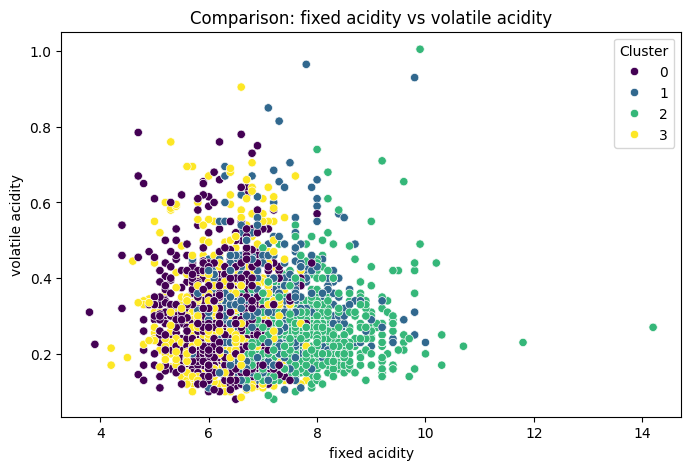

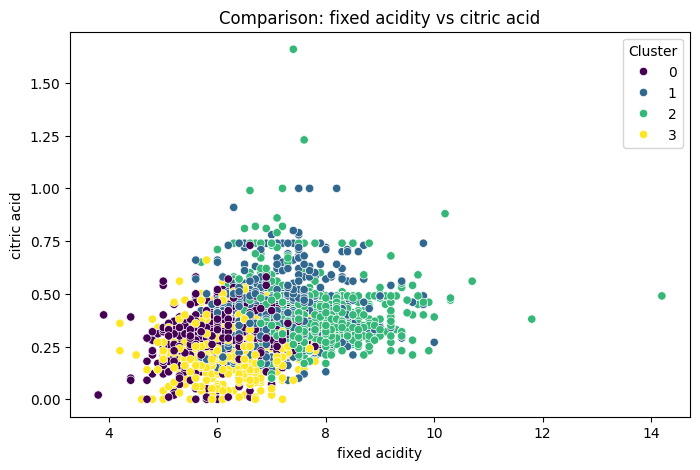

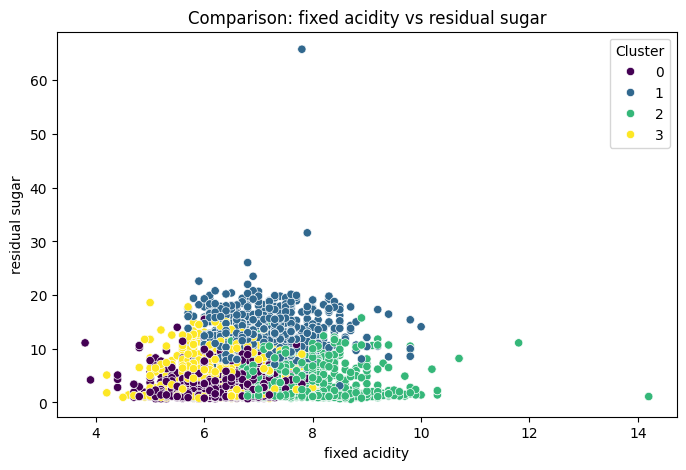

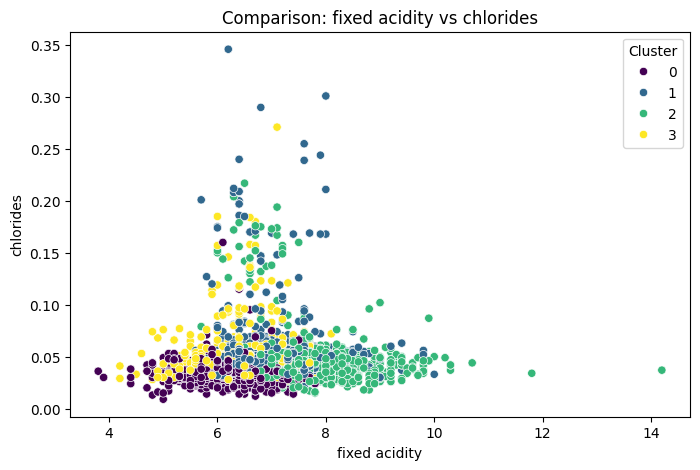

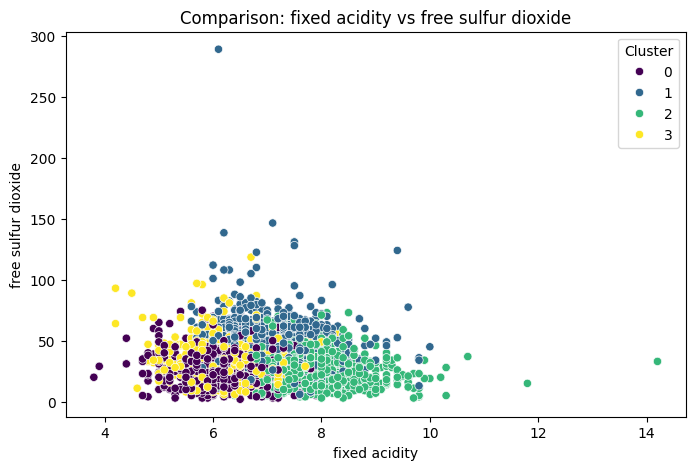

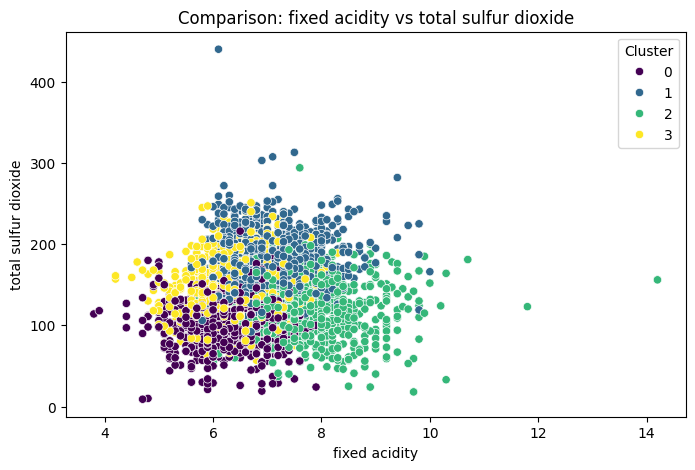

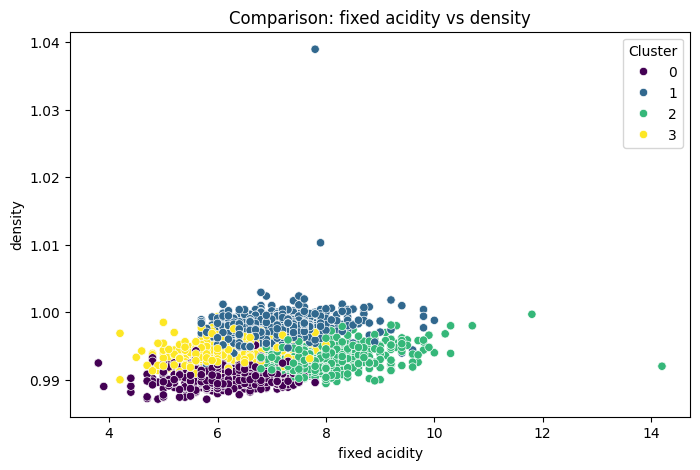

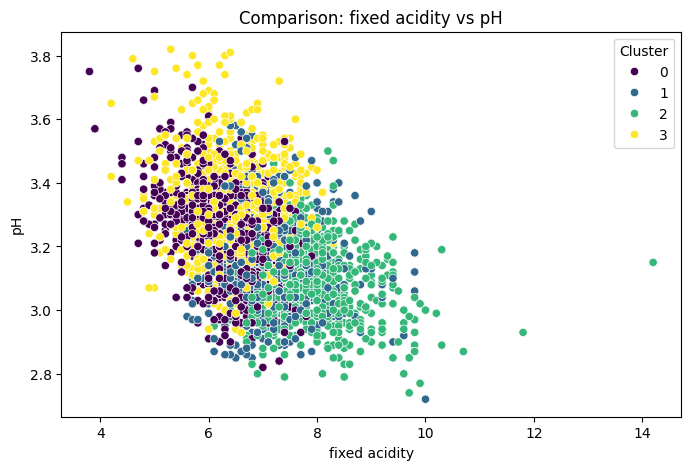

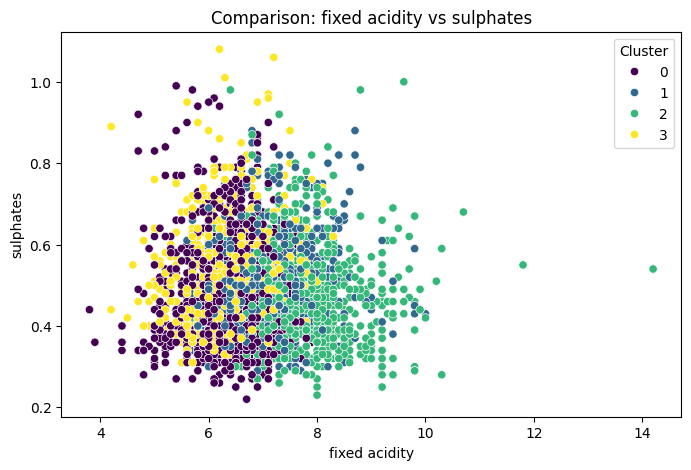

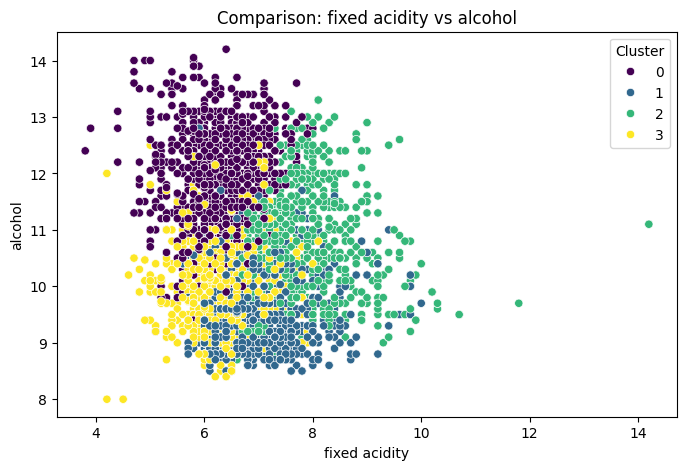

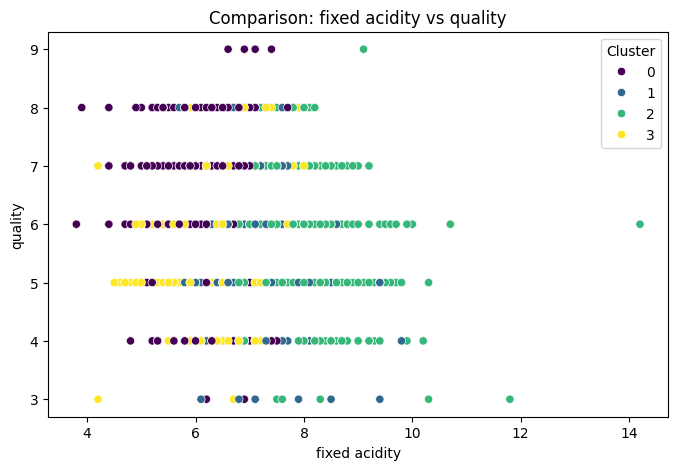

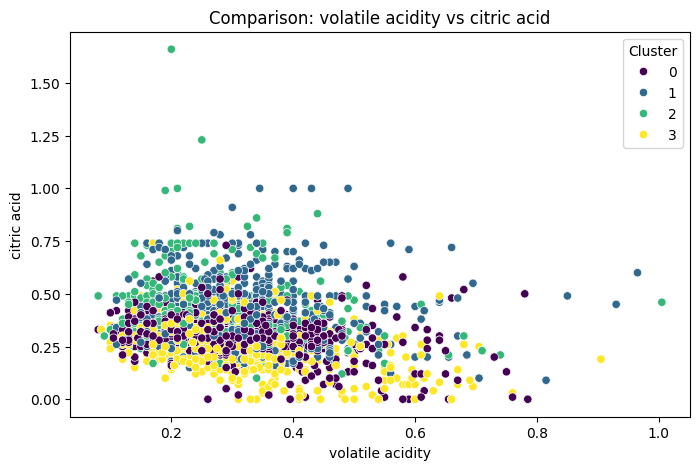

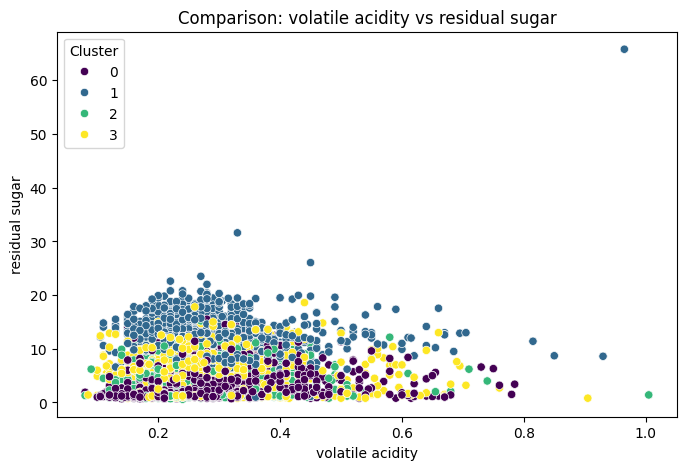

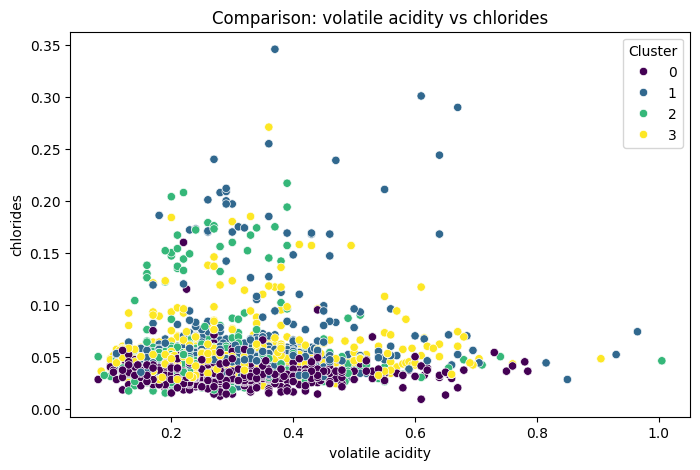

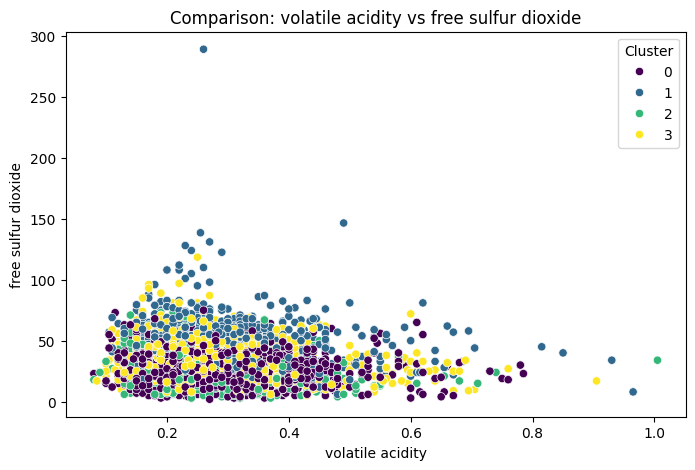

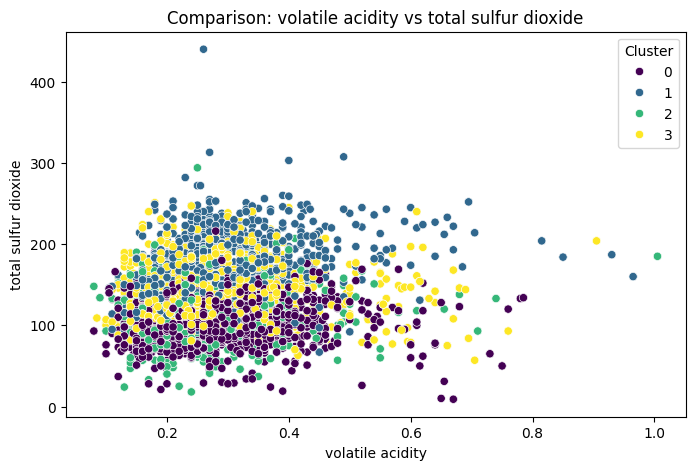

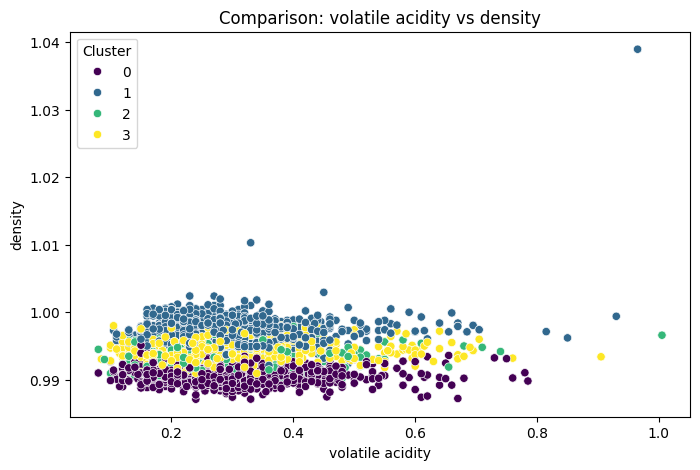

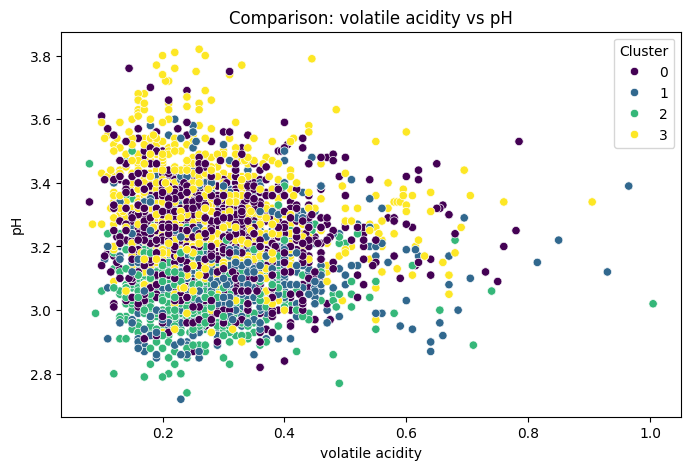

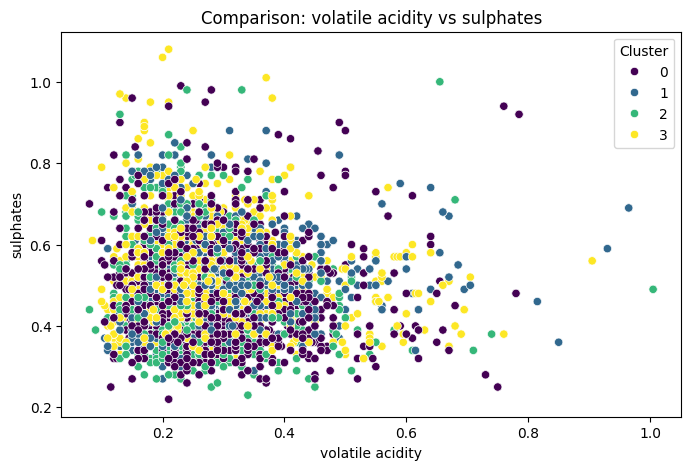

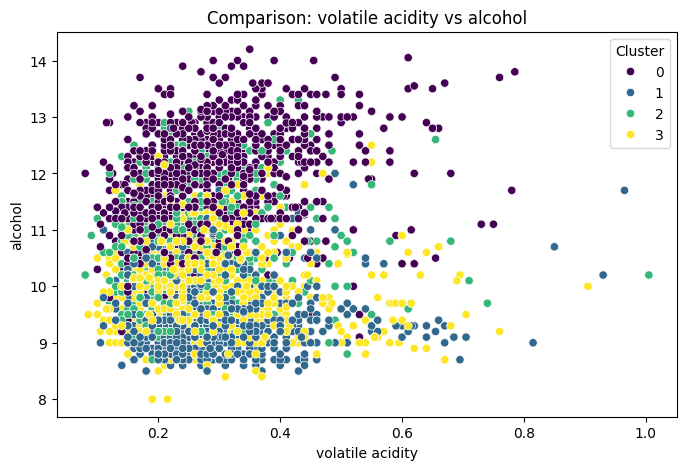

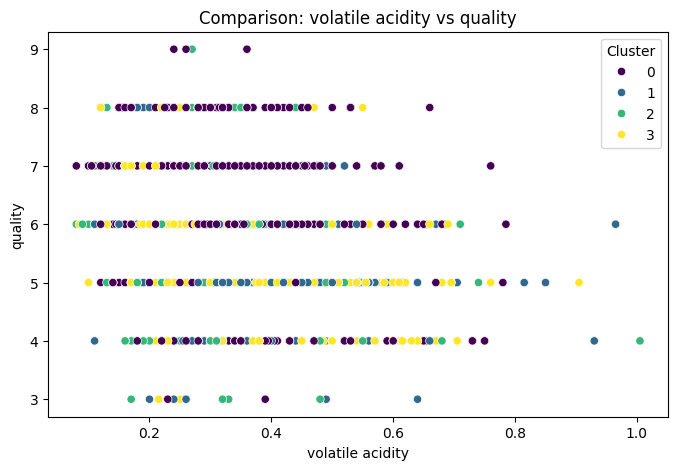

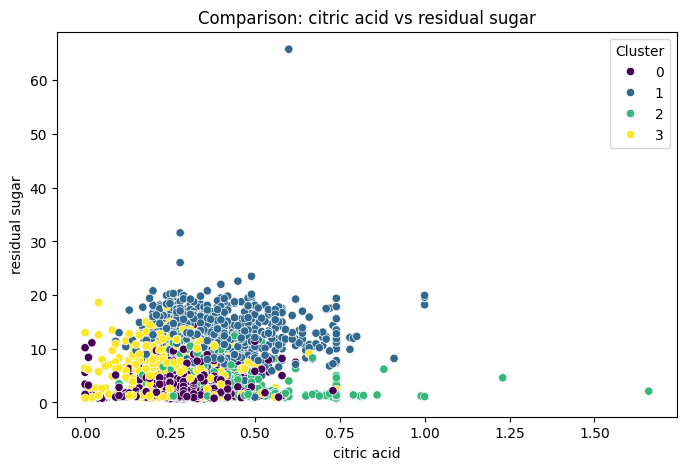

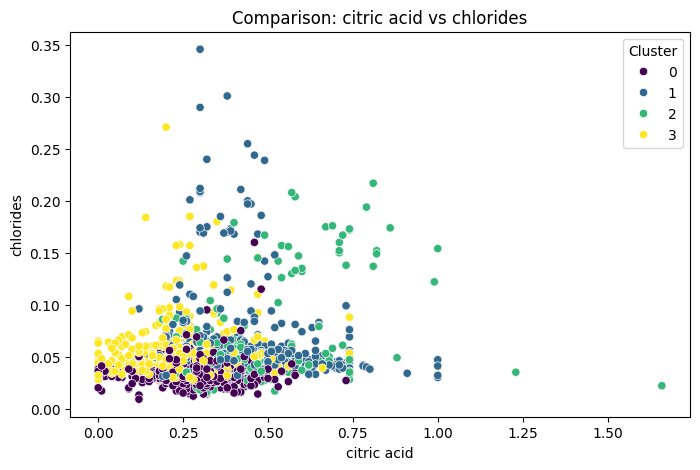

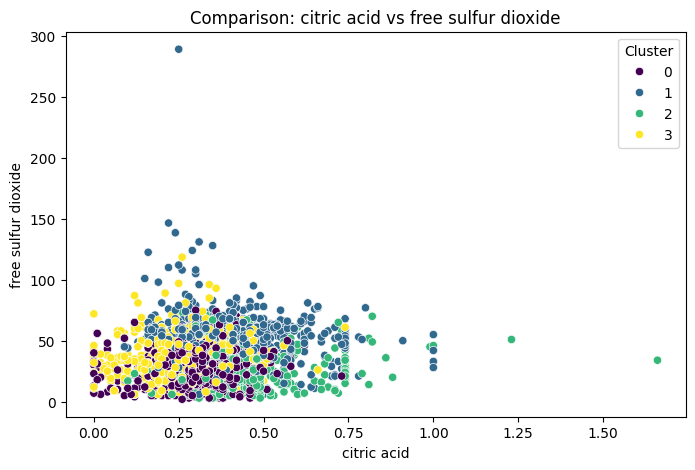

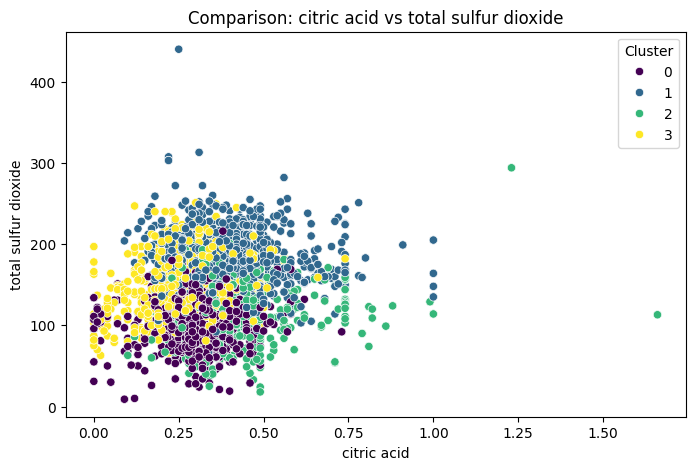

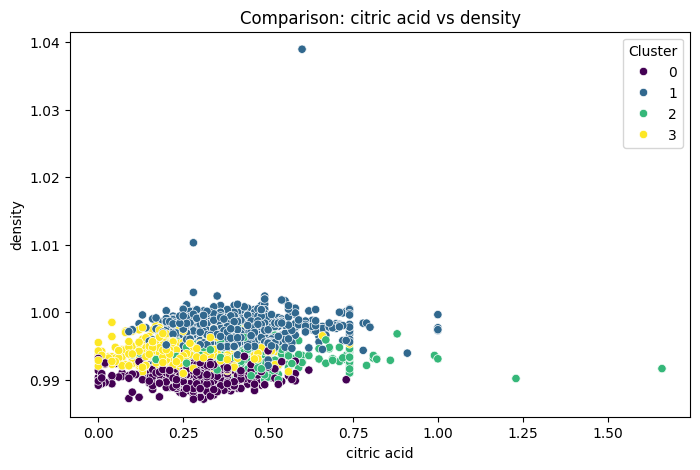

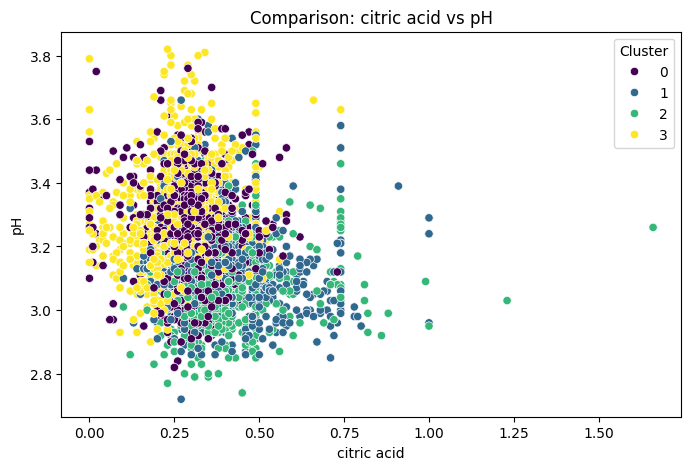

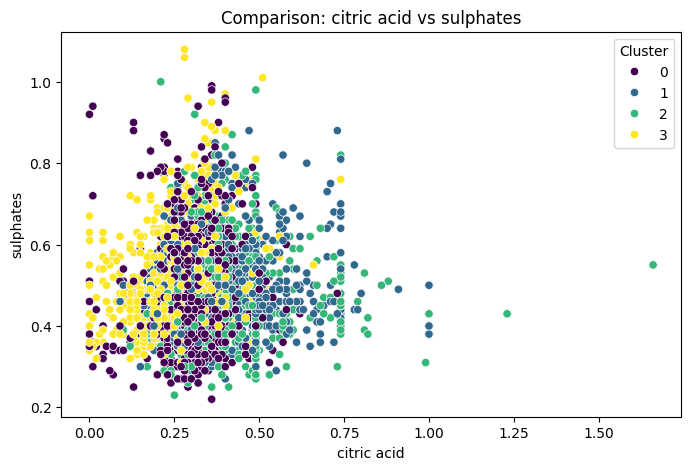

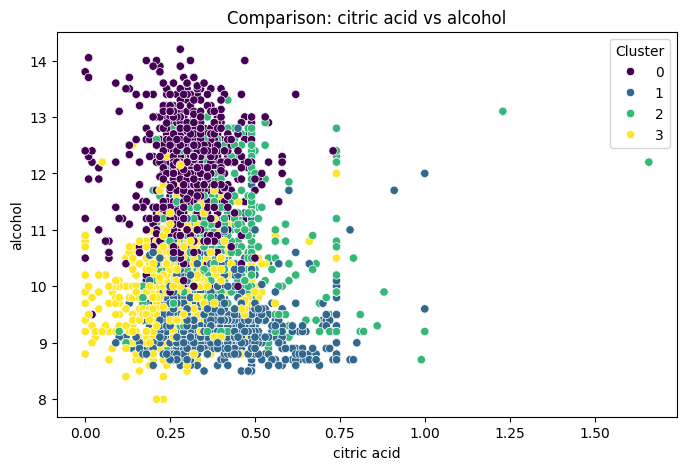

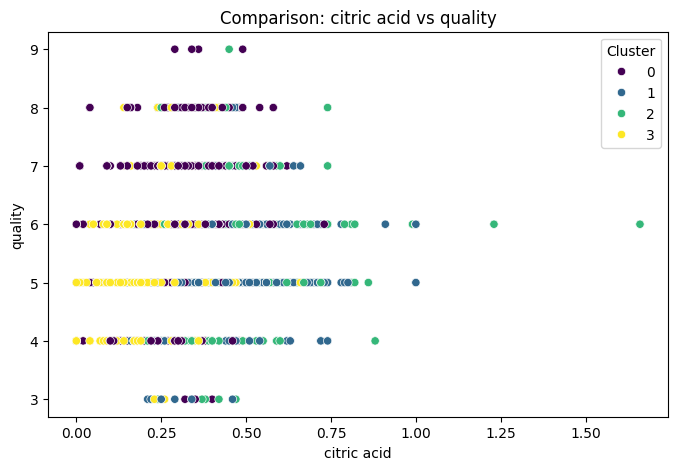

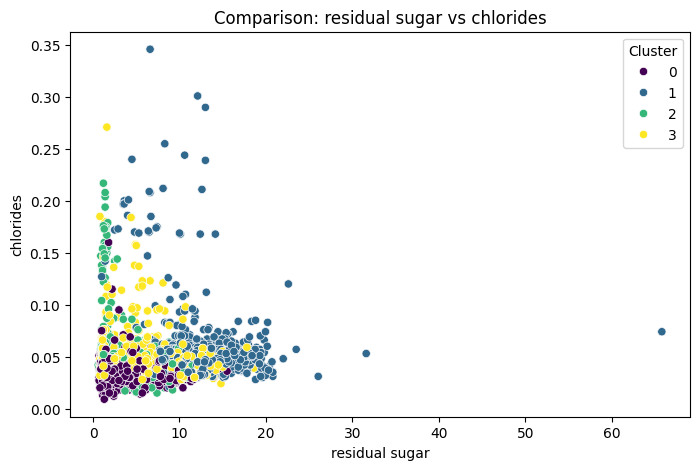

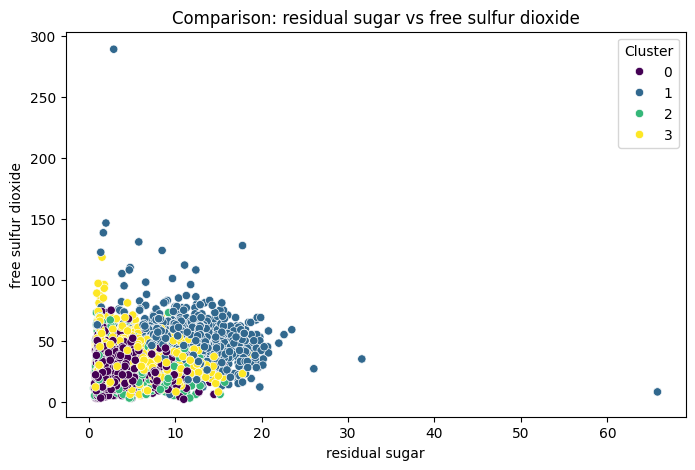

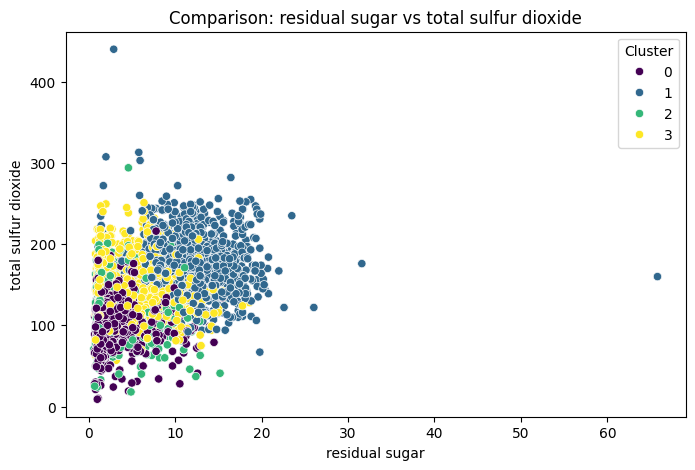

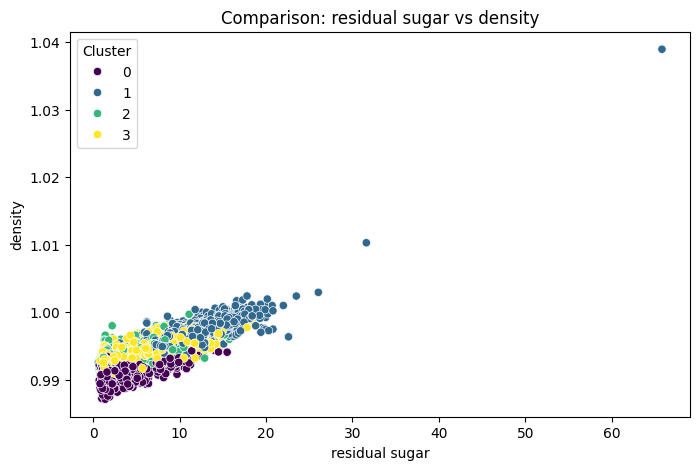

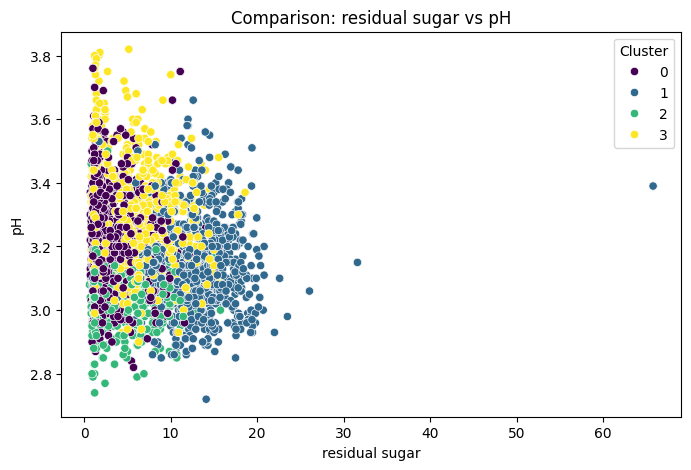

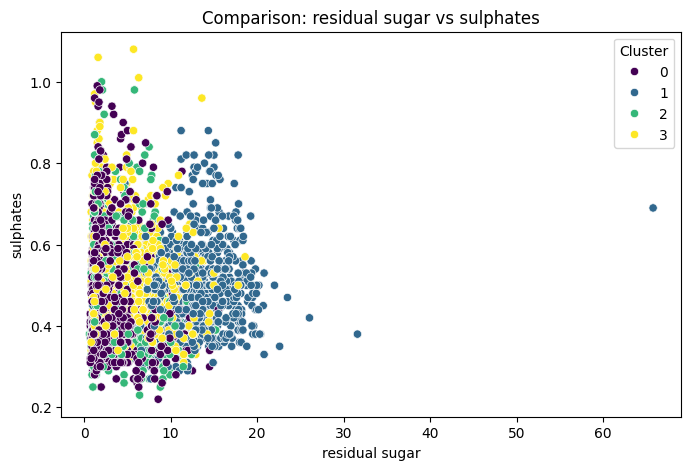

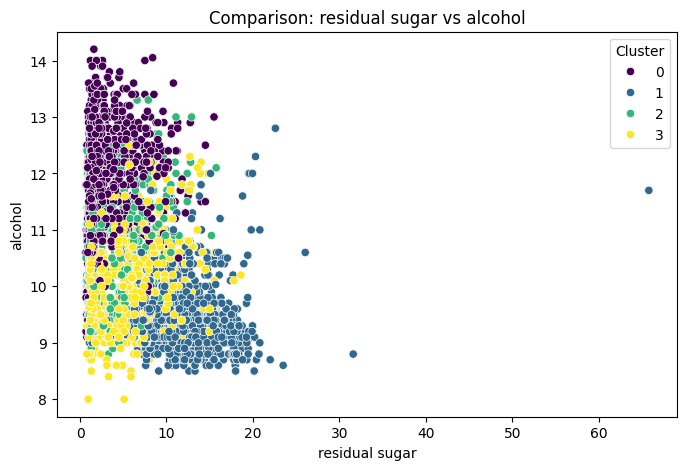

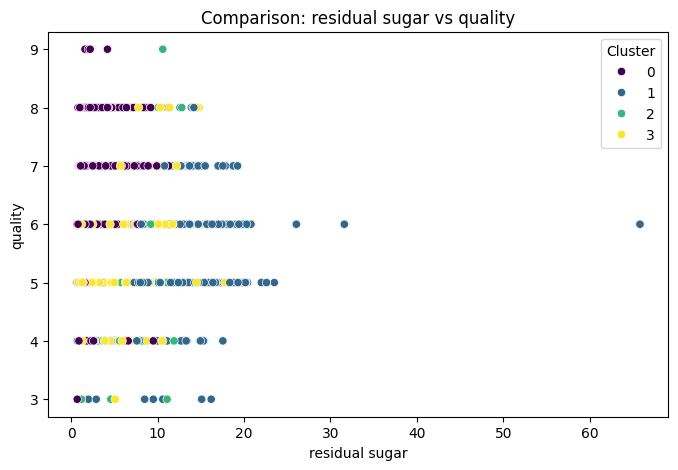

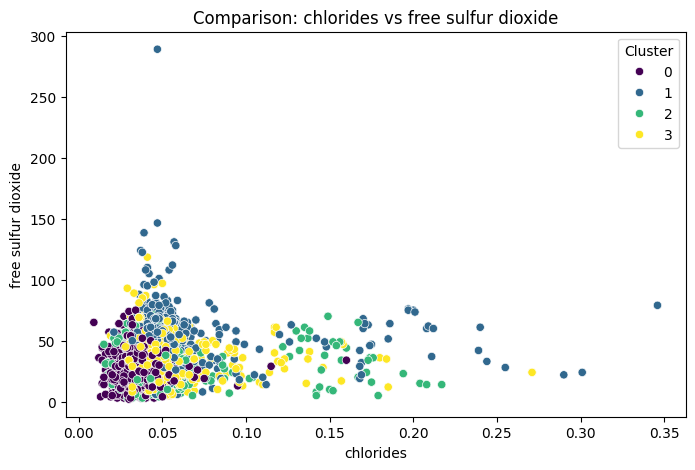

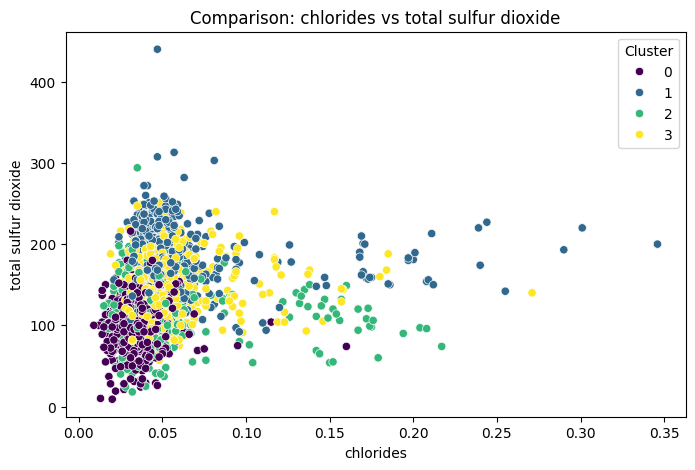

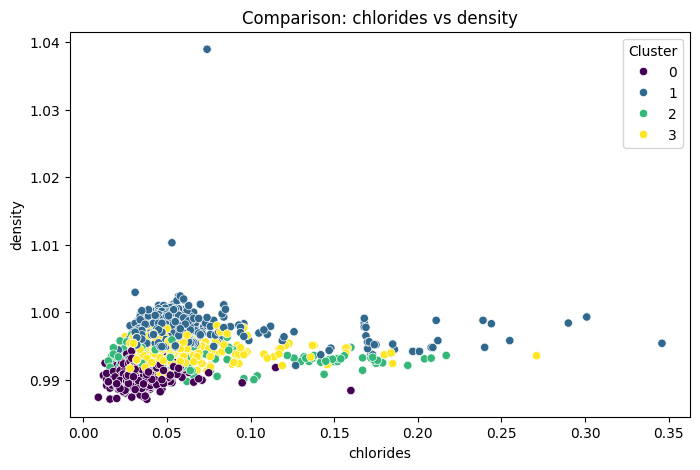

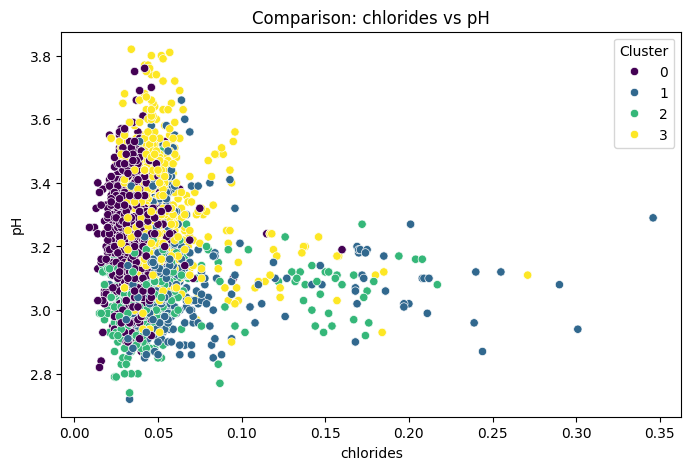

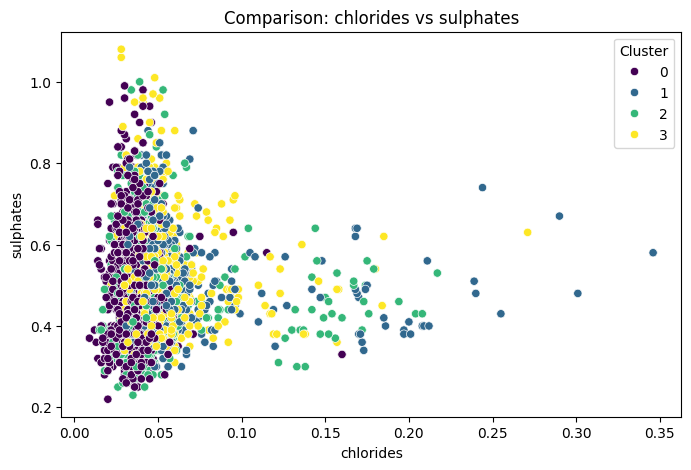

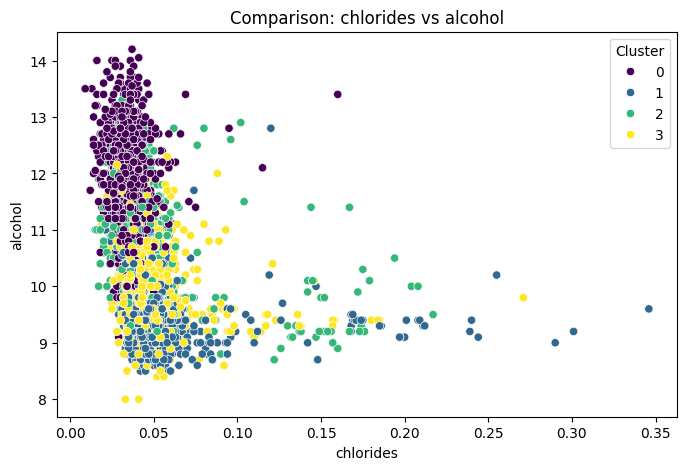

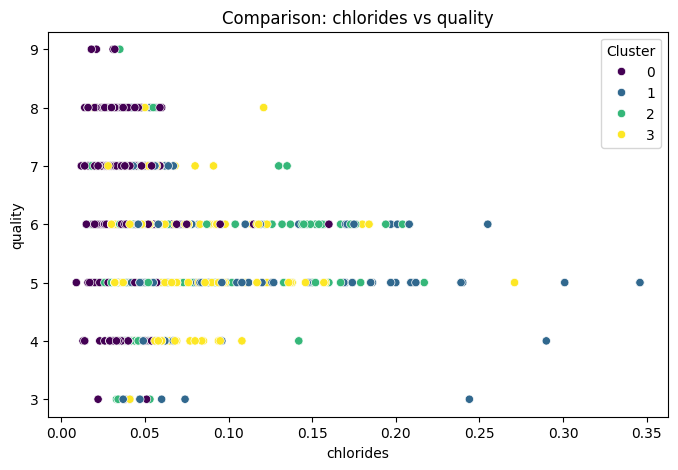

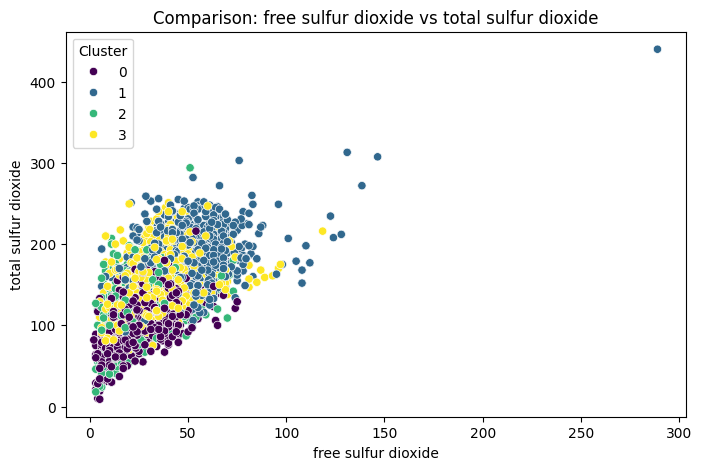

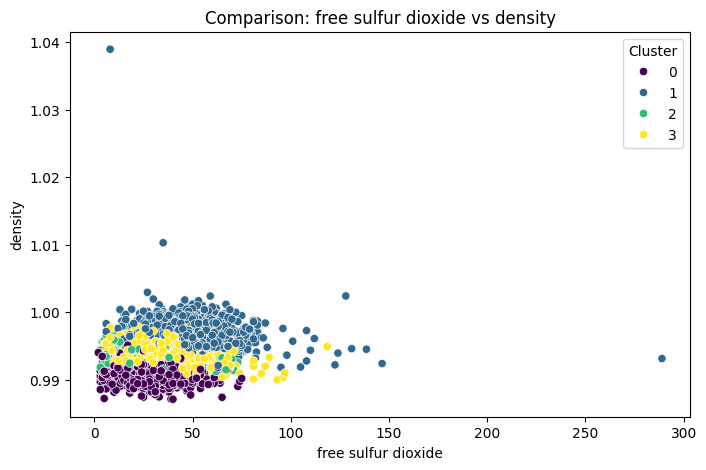

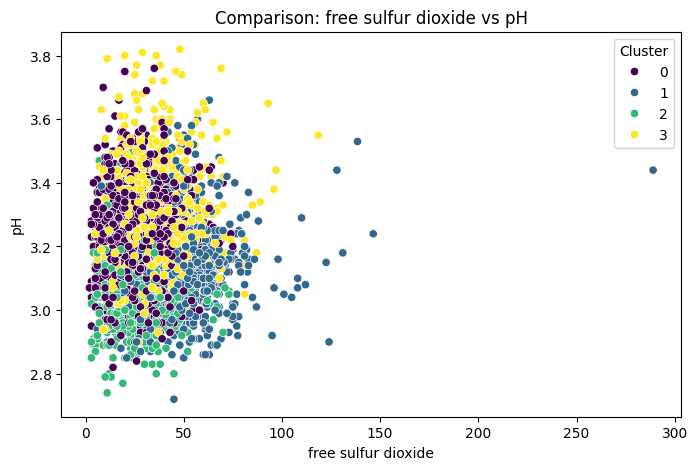

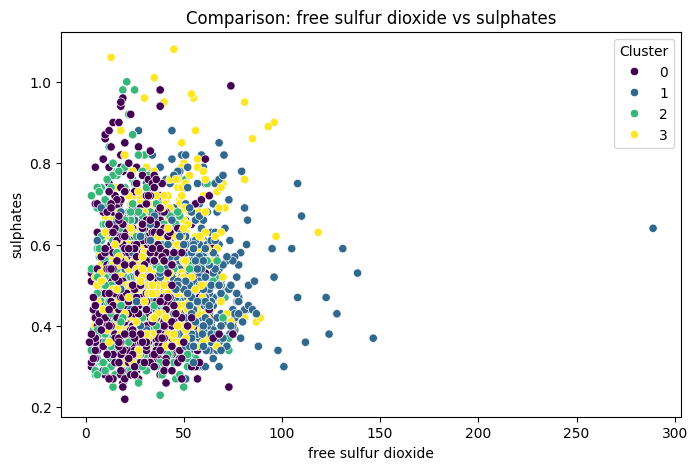

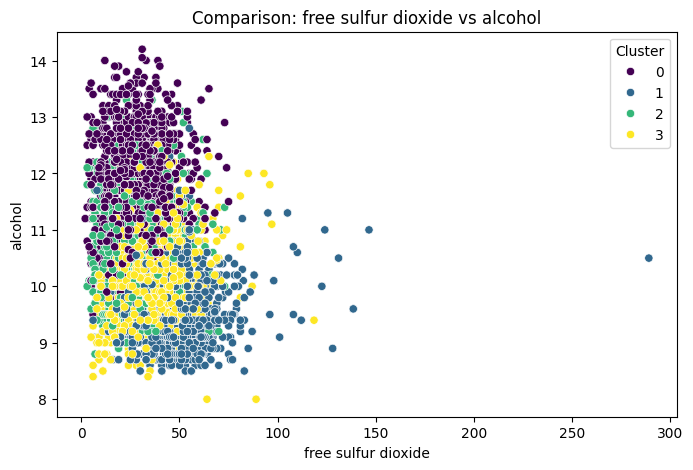

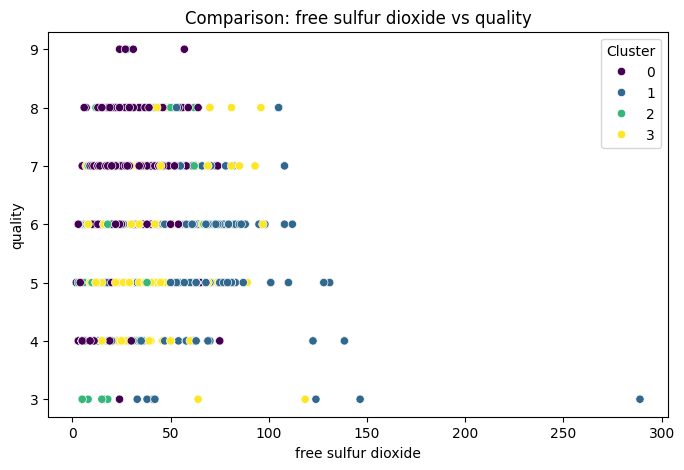

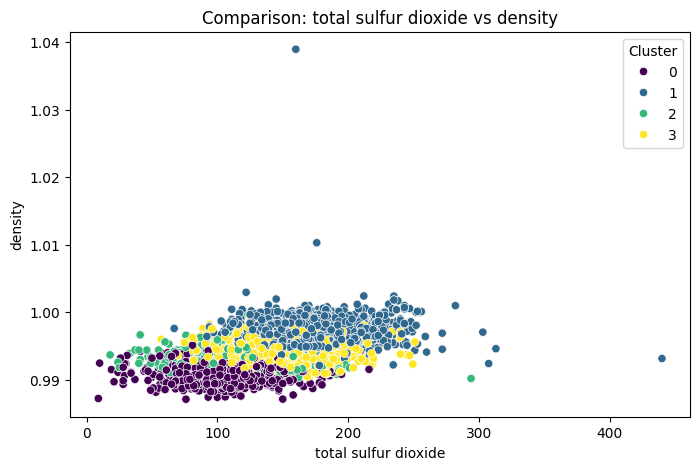

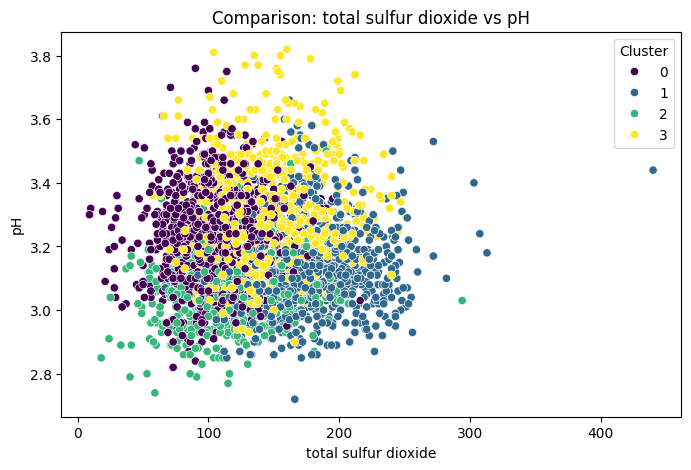

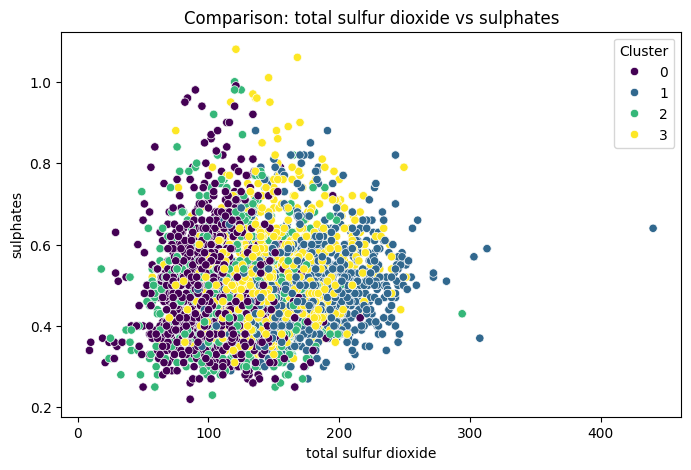

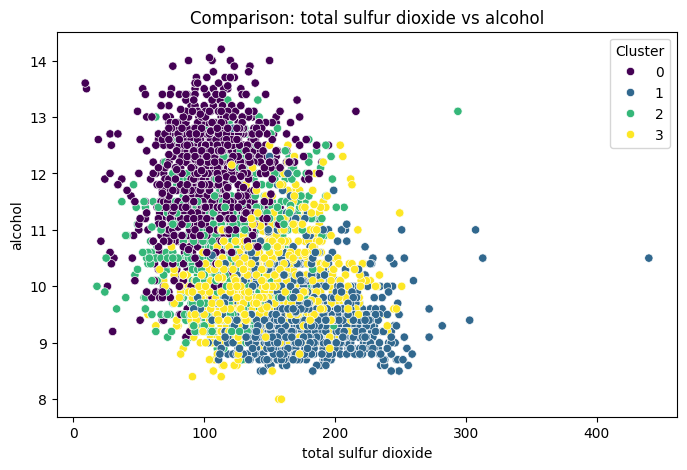

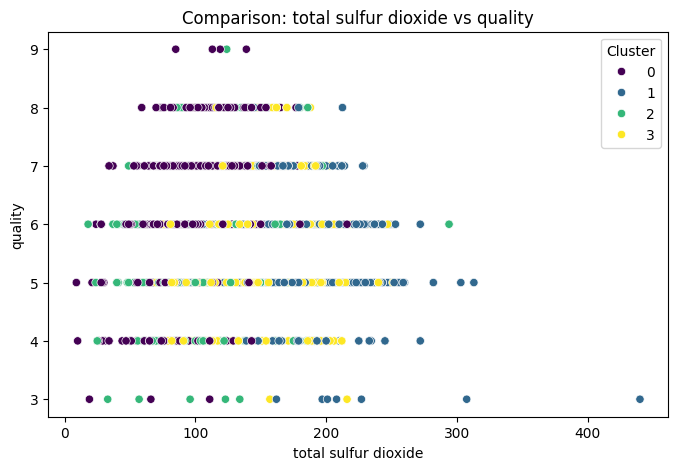

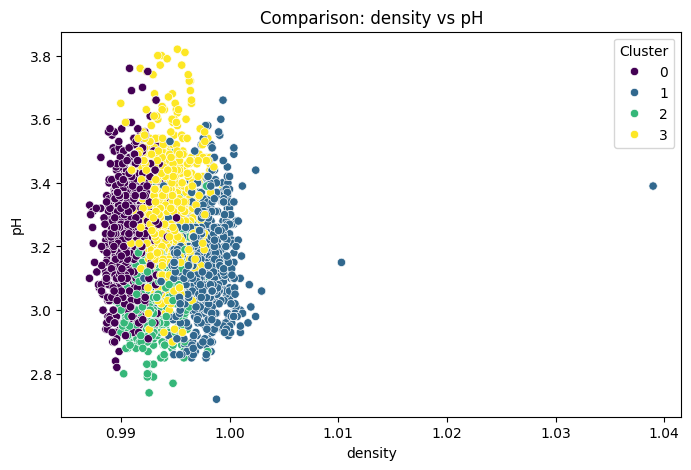

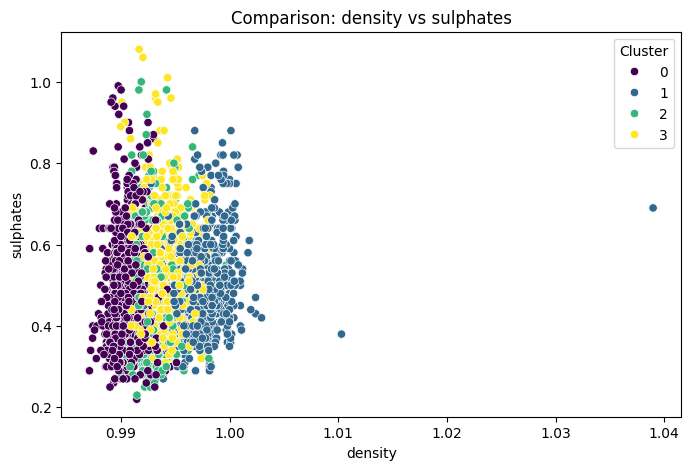

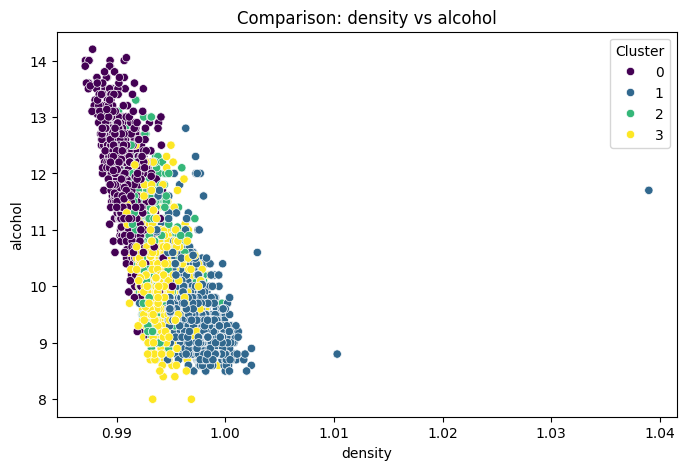

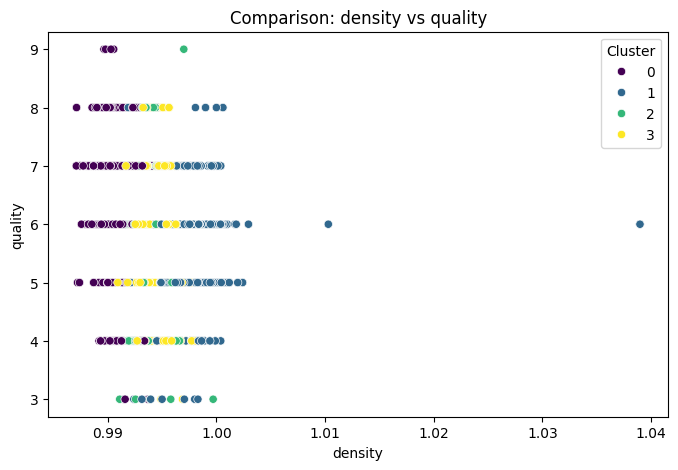

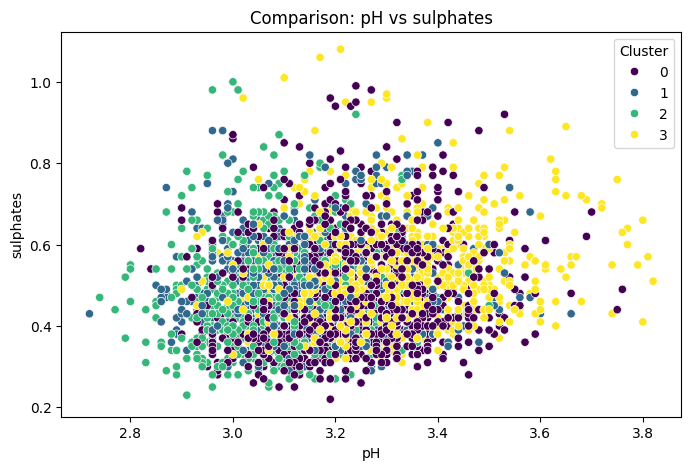

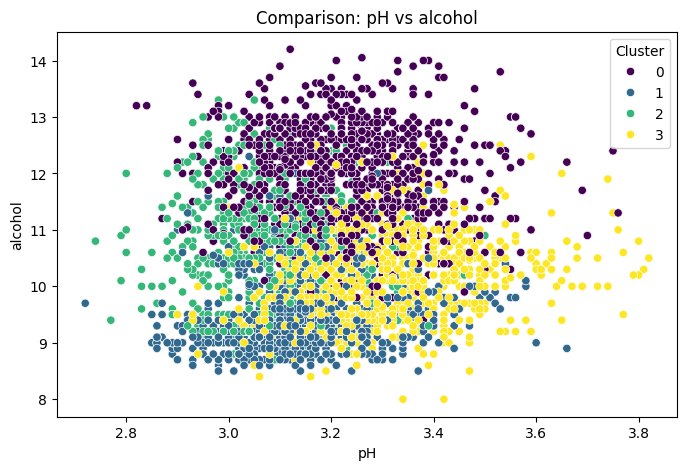

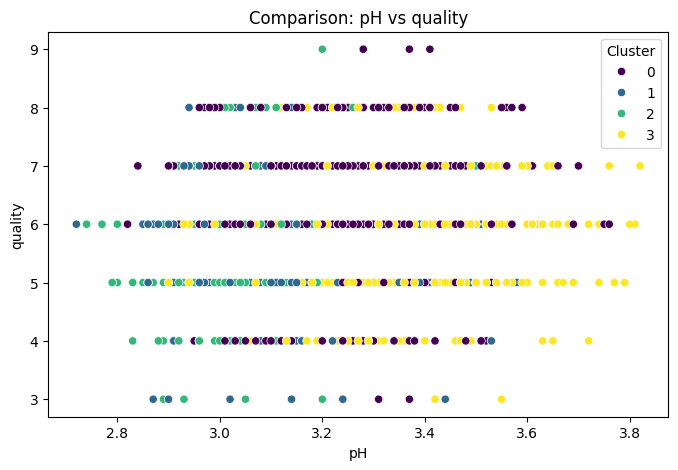

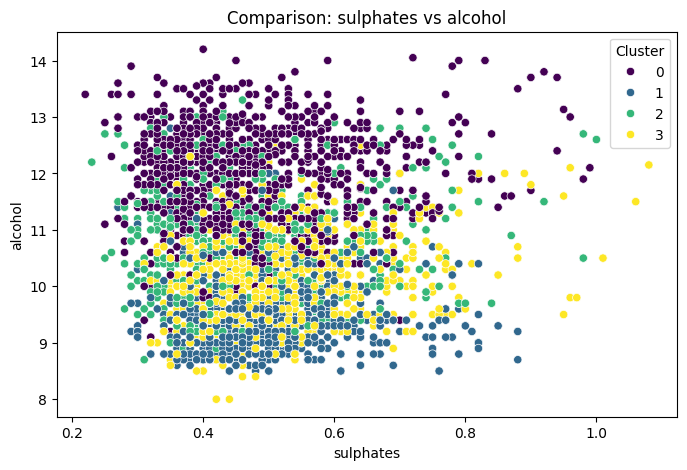

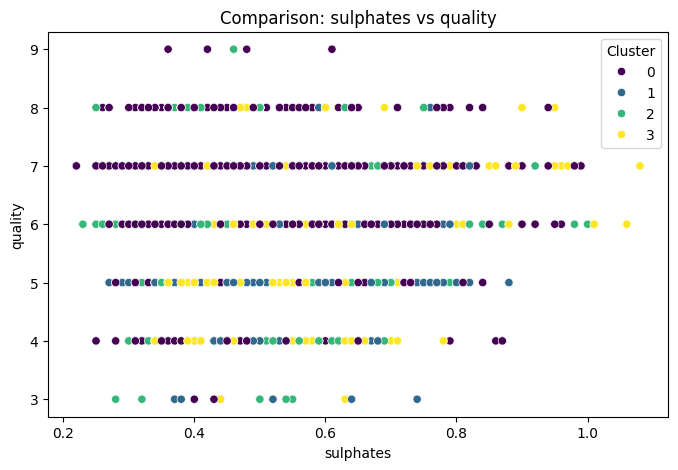

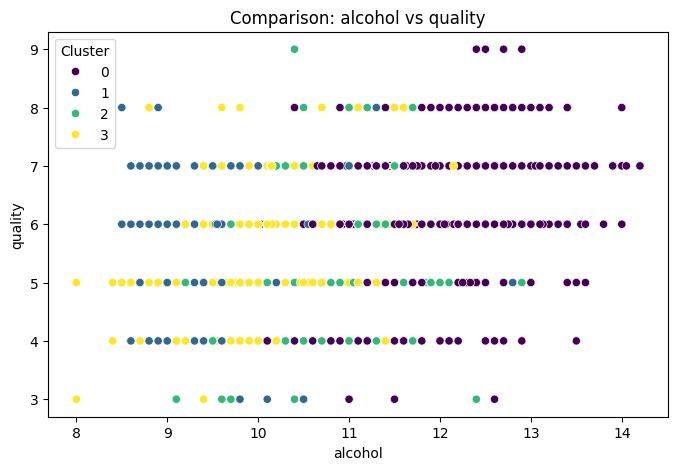

In [51]:
# get only numeric only
numeric_cols = df.select_dtypes(include="number").columns.drop("cluster")

# create all possible combinations of variables
column_pairs = list(itertools.combinations(numeric_cols, 2))

# just a helper variable so we can quickly turn off the visualizations
# since they take a bit time
skip_visuals = False

for x_col, y_col in column_pairs:
    if skip_visuals:
        break

    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df, x=x_col, y=y_col, hue="cluster", palette="viridis")
    plt.title(f"Comparison: {x_col} vs {y_col}")
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.legend(title="Cluster")
    plt.show()

<h4>The visualization above quite shows there are noise and outliers in the clusters and also fixed acidity and sulfates quite well 
represented as features</h4>

In [52]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'cluster'],
      dtype='object')

In [53]:
# X/y -split
X = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'cluster']]

y = df['quality']

In [54]:
authentic_sample

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0              8.5              0.26         0.21            16.2      0.074   
1              5.8              0.24         0.44             3.5      0.029   
2              9.1              0.59         0.38             1.6      0.066   
3              7.1              0.32         0.32            11.0      0.038   
4              6.9              0.39         0.40             4.6      0.022   
..             ...               ...          ...             ...        ...   
280            9.1              0.27         0.45            10.6      0.035   
281            6.6              0.36         0.29             1.6      0.021   
282            7.4              0.24         0.36             2.0      0.031   
283            6.9              0.36         0.34             4.2      0.018   
284            7.1              0.26         0.49             2.2      0.032   

     free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                   41.0                 197.0  0.99800  3.02       0.50   
1                    5.0                 109.0  0.99130  3.53       0.43   
2                   34.0                 182.0  0.99680  3.23       0.38   
3                   16.0                  66.0  0.99370  3.24       0.40   
4                    5.0                  19.0  0.99150  3.31       0.37   
..                   ...                   ...      ...   ...        ...   
280                 28.0                 124.0  0.99700  3.20       0.46   
281                 24.0                  85.0  0.98965  3.41       0.61   
282                 27.0                 139.0  0.99055  3.28       0.48   
283                 57.0                 119.0  0.98980  3.28       0.36   
284                 31.0                 113.0  0.99030  3.37       0.42   

     alcohol  quality  cluster  
0        9.8        3        1  
1       11.7        3        0  
2        8.5        3        1  
3       11.5        3        0  
4       12.6        3        0  
..       ...      ...      ...  
280     10.4        9        2  
281     12.4        9        0  
282     12.5        9        0  
283     12.7        9        0  
284     12.9        9        0  

[285 rows x 13 columns]

In [55]:
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               6.2              0.32         0.16             7.0      0.045   
...             ...               ...          ...             ...        ...   
7622            6.2              0.21         0.29             1.6      0.039   
7623            6.6              0.32         0.36             8.0      0.047   
7624            6.5              0.24         0.19             1.2      0.041   
7625            5.5              0.29         0.30             1.1      0.022   
7626            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    30.0                 136.0  0.99490  3.18       0.47   
...                   ...                   ...      ...   ...        ...   
7622                 24.0                  92.0  0.99114  3.27       0.50   
7623                 57.0                 168.0  0.99490  3.15       0.46   
7624                 30.0                 111.0  0.99254  2.99       0.46   
7625                 20.0                 110.0  0.98869  3.34       0.38   
7626                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  cluster  
0         8.8        6        1  
1         9.5        6        3  
2        10.1        6        2  
3         9.9        6        1  
4         9.6        6        3  
...       ...      ...      ...  
7622     11.2        6        0  
7623      9.6        5        1  
7624      9.4        6        3  
7625     12.8        7        0  
7626     11.8        6        0  

[7627 rows x 13 columns]

In [56]:

categories = list(np.unique(df['quality']))

# let's encode our target from the original 3,4,5,6,7,8 to 0,1,2,3,4,5
le = LabelEncoder()
y = le.fit_transform(y)

# if bad result, consider shuffling the dataset just in case

# stratify can be used to ensure that train/test -split aims to have same distributions
# for both train and test datasets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

X_train = X
y_train = y

X_test = authentic_sample[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'cluster']]


y_test = authentic_sample['quality']
y_test = le.transform(y_test)


In [57]:
model = XGBClassifier(
    objective="multi:softmax",
    num_class=6,
    n_estimators = 300,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8
)

model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=300,
              n_jobs=0, num_class=6, num_parallel_tree=1,
              objective='multi:softmax', predictor='auto', random_state=0, ...)

In [58]:
test_predictions = model.predict(X_test)

<Axes: >

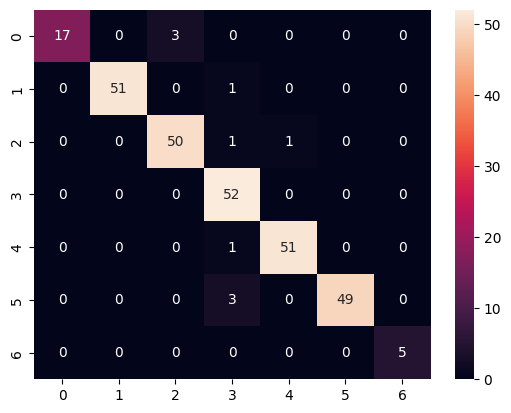

In [59]:
sns.heatmap(confusion_matrix(y_test, test_predictions), annot=True, fmt='g')

In [60]:
# visualization on the 
# precision,
# recall,
# f1-score,
# and the accuracy
print(classification_report(y_test, test_predictions))

acc = accuracy_score(y_test, test_predictions)
print("\nModel overall accuracy: {:.2f}%".format(acc * 100))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        20
           1       1.00      0.98      0.99        52
           2       0.94      0.96      0.95        52
           3       0.90      1.00      0.95        52
           4       0.98      0.98      0.98        52
           5       1.00      0.94      0.97        52
           6       1.00      1.00      1.00         5

    accuracy                           0.96       285
   macro avg       0.97      0.96      0.97       285
weighted avg       0.97      0.96      0.96       285


Model overall accuracy: 96.49%
